In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '/kaggle/input/zombies-data/zombies_data.csv'
df = pd.read_csv(path)
df

,SprintSpeed,AmmoClips,Result
0,12.0,0,0
1,14.5,1,0
2,10.0,2,0
3,18.0,0,0
4,8.5,4,0
5,15.0,1,0
6,22.0,0,1
7,11.0,5,1
8,13.0,2,0
9,20.5,1,1


In [2]:
def gradient_descent(X, y, lr=0.05, iters=50000):
    m, n = X.shape
    w = np.zeros((n, 1))
    losses = []

    for i in range(iters):
        z = X @ w
        h = sigmoid(z)
        loss = -(1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
        losses.append(loss)
        error = h - y
        grad = (1/m) * (X.T @ error)
        w -= lr * grad

    return w, losses

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
x = np.column_stack((df['SprintSpeed'], df['AmmoClips']))
y = np.array(df['Result']).reshape(-1, 1)
m = x.shape[0]

speed = df['SprintSpeed'].values
ammo  = df['AmmoClips'].values

speed_mean, speed_std = speed.mean(), speed.std()
ammo_mean,  ammo_std  = ammo.mean(),  ammo.std()

speed_norm = (speed - speed_mean) / speed_std
ammo_norm  = (ammo  - ammo_mean)  / ammo_std

x_norm = np.column_stack((speed_norm, ammo_norm))
x_bias = np.hstack([np.ones((m, 1)), x_norm])
w, losses = gradient_descent(x_bias, y)
print("Learned weights:", w.ravel())

Learned weights: [ 2.39680909 11.4879722   8.15704913]


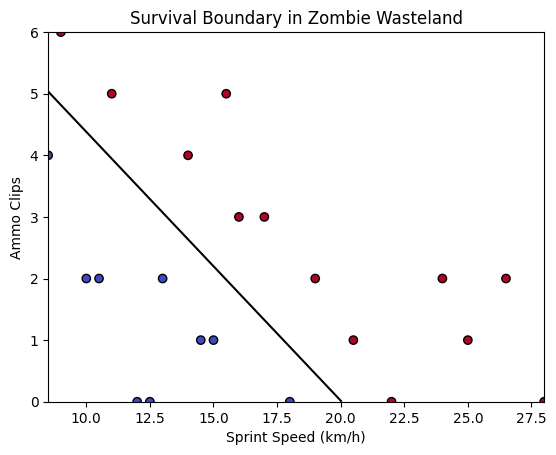

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), cmap='coolwarm', edgecolors='k')

x_min, x_max = x[:,0].min(), x[:,0].max()
y_min, y_max = x[:,1].min(), x[:,1].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

xx_norm = (xx - speed_mean) / speed_std
yy_norm = (yy - ammo_mean)  / ammo_std

zz = sigmoid(w[0] + w[1]*xx_norm + w[2]*yy_norm)

plt.contour(xx, yy, zz, levels=[0.5], colors='black')

plt.xlabel("Sprint Speed (km/h)")
plt.ylabel("Ammo Clips")
plt.title("Survival Boundary in Zombie Wasteland")
plt.savefig("A1_240631_Q7db.jpg", dpi=300)
plt.show()

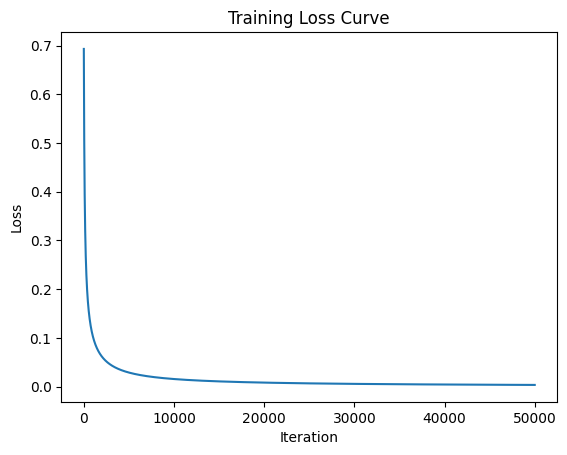

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.savefig("A1_240631_Q7loss.jpg", dpi=300)
plt.show()

In [6]:
speed_test = 25
ammo_test = 1
speed_test_norm = (speed_test - speed_mean) / speed_std
ammo_test_norm  = (ammo_test  - ammo_mean)  / ammo_std
x_test = np.array([1, speed_test_norm, ammo_test_norm]).reshape(1, -1)
prob = sigmoid(x_test @ w)[0][0]
result = 1 if prob >= 0.5 else 0

In [7]:
print(f'Result is {result} for a speed of 25 kmph and 1 ammo clip.')

Result is 1 for a speed of 25 kmph and 1 ammo clip.
